<a href="https://colab.research.google.com/github/ismailachbani/coursera-test/blob/main/Cooding_Week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Début
```



In [ ]:
import numpy as np
import pandas as pd
header = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(r'/content/u.data', sep='\t', names=header)
n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
print('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_items))

Number of users = 943 | Number of movies = 1682


TOUTE LA DATA DEVISE EN 75 25


[Epoch 1/15] train error: 1.162003, test error: 1.254643, train precision: 0.284254, train recall: 0.163541, train f1: 0.207627
[Epoch 2/15] train error: 0.876842, test error: 1.038810, train precision: 0.292886, train recall: 0.205037, train f1: 0.241212
[Epoch 3/15] train error: 0.793906, test error: 0.997413, train precision: 0.280883, train recall: 0.221392, train f1: 0.247614
[Epoch 4/15] train error: 0.753699, test error: 0.976756, train precision: 0.282569, train recall: 0.229448, train f1: 0.253253
[Epoch 5/15] train error: 0.730666, test error: 0.963879, train precision: 0.286911, train recall: 0.234104, train f1: 0.257831
[Epoch 6/15] train error: 0.715864, test error: 0.955176, train precision: 0.291613, train recall: 0.237046, train f1: 0.261514
[Epoch 7/15] train error: 0.705661, test error: 0.949070, train precision: 0.295967, train recall: 0.239167, train f1: 0.264553
[Epoch 8/15] train error: 0.698329, test error: 0.944643, train precision: 0.299753, train recall: 0.240

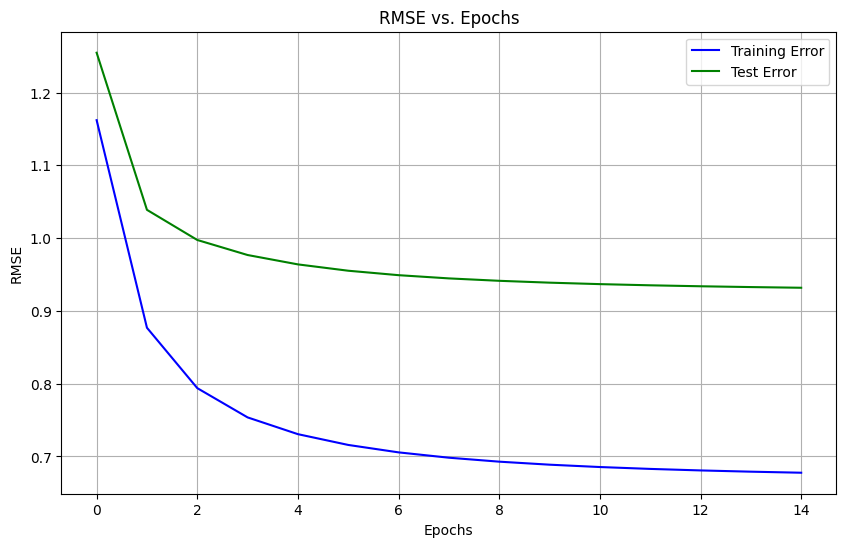

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read data
header = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(r'/content/u.data', sep='\t', names=header)

# Unique users and items
n_users = df.user_id.nunique()
n_items = df.item_id.nunique()

# Train-test split
train_data, test_data = train_test_split(df, test_size=0.20)

# Convert to DataFrames
train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)

# Create training and test matrix
R = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    R[line[1]-1, line[2]-1] = line[3]

T = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    T[line[1]-1, line[2]-1] = line[3]

# Index matrix for training data
I = R.copy()
I[I > 0] = 1
I[I == 0] = 0

# Index matrix for test data
I2 = T.copy()
I2[I2 > 0] = 1
I2[I2 == 0] = 0

# Function to calculate RMSE
def rmse(I, R, Q, P):
    return np.sqrt(np.sum((I * (R - np.dot(P.T, Q)))**2) / len(R[R > 0]))


def precision(I, R, Q, P):
    # Calcul des prédictions
    predictions = np.dot(P.T, Q)

    # Nombre d'items recommandés qui sont également dans la liste d'items réels
    vrai_positifs = np.sum((I * R) > 0)

    # Nombre total d'items recommandés avec une prédiction proche de la valeur réelle
    faux_positifs = np.sum(np.abs(predictions - R) <= 1)

    # Calcul de la précision
    precision_score = vrai_positifs / (vrai_positifs + faux_positifs) if (vrai_positifs + faux_positifs) > 0 else 0

    return precision_score

def recall(I, R, Q, P):
    # Calcul des prédictions
    predictions = np.dot(P.T, Q)

    # Nombre total d'éléments réels positifs
    total_positives = np.sum(R)

    # Nombre de vrais positifs correctement prédits (évaluations proches)
    true_positives = np.sum(np.logical_and((I * R) > 0, np.abs(R - predictions) <= 1))

    # Calcul du rappel
    recall_score = true_positives / total_positives if total_positives > 0 else 0

    return recall_score

def f1_score(precision, recall):
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)
# Model parameters
lmbda = 0.1
k = 20
m, n = R.shape
n_epochs = 15

# Initialize matrices
P = 3 * np.random.rand(k, m)
Q = 3 * np.random.rand(k, n)
Q[0, :] = R[R != 0].mean(axis=0)
E = np.eye(k)

# Learning rate
lr = 0.001

# Error matrices
train_errors = []
test_errors = []
train_precisions = []
train_recalls = []
train_f1s = []
# Training loop
for epoch in range(n_epochs):
    for i, Ii in enumerate(I):
        nui = np.count_nonzero(Ii)
        if nui == 0:
            nui = 1

        Ii_nonzero = np.nonzero(Ii)[0]
        Q_Ii = Q[:, Ii_nonzero]
        R_Ii = R[i, Ii_nonzero]
        Ai = np.dot(Q_Ii, Q_Ii.T) + lmbda * nui * E
        Vi = np.dot(Q_Ii, R_Ii.T)
        P[:, i] = np.linalg.solve(Ai, Vi)

    for j, Ij in enumerate(I.T):
        nmj = np.count_nonzero(Ij)
        if nmj == 0:
            nmj = 1

        Ij_nonzero = np.nonzero(Ij)[0]
        P_Ij = P[:, Ij_nonzero]
        R_Ij = R[Ij_nonzero, j]
        Aj = np.dot(P_Ij, P_Ij.T) + lmbda * nmj * E
        Vj = np.dot(P_Ij, R_Ij)
        Q[:, j] = np.linalg.solve(Aj, Vj)

    # Calculate errors
# Calculate errors and precision
    train_rmse = rmse(I, R, Q, P)
    test_rmse = rmse(I2, T, Q, P)
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)

    # Calculer la précision et l'ajouter à la liste
    train_precision = precision(I, R, Q, P)
    train_precisions.append(train_precision)
    # Calculer le rappel et l'ajouter à la liste
    train_recall = recall(I, R, Q, P)
    train_recalls.append(train_recall)
    train_f1 = f1_score(train_precision, train_recall)

    # Append train_f1 to your list
    train_f1s.append(train_f1)

    print("[Epoch %d/%d] train error: %f, test error: %f, train precision: %f, train recall: %f, train f1: %f" % (epoch + 1, n_epochs, train_rmse, test_rmse, train_precision, train_recall, train_f1))


# Calculate the average RMSE and precision
avg_train_rmse = np.mean(train_errors)
avg_test_rmse = np.mean(test_errors)
avg_train_precision = np.mean(train_precisions)
avg_train_recall = np.mean(train_recalls)
avg_train_f1= np.mean(train_f1s)


print("Average Train RMSE:", avg_train_rmse)
print("Average Test RMSE:", avg_test_rmse)
print("Average Train Precision:", avg_train_precision)
print("Average Train Recall:", avg_train_recall)
print("Average Train F1 Score:", avg_train_f1)
# Plotting
epochs = np.arange(n_epochs)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_errors, label='Training Error', color='blue')
plt.plot(epochs, test_errors, label='Test Error', color='green')


plt.title('RMSE vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()


CALCULER LES PREDICTION DE RATING

In [ ]:

# Calculate prediction matrix R_hat (low-rank approximation for R)
R_hat = pd.DataFrame(np.dot(P.T,Q))
R = pd.DataFrame(R)
T=  pd.DataFrame(T)
# Assurez-vous que R_hat a les mêmes indices et colonnes que R et T
R_hat = pd.DataFrame(np.dot(P.T, Q), index=R.index, columns=R.columns)

# Définir le nombre de films à afficher
n_films = 20  # Vous pouvez modifier cette valeur selon vos besoins

# Sélectionnez les évaluations réelles de l'utilisateur 17 dans l'ensemble de test
user_id = 10  # Utilisateur 17, ajustement pour l'indexation à partir de 0
actual_ratings = T.loc[user_id, T.loc[user_id, :] > 0]

# Sélectionnez les n premiers films évalués par cet utilisateur
actual_ratings_n = actual_ratings.head(n_films)

# Utilisez les indices des films évalués dans 'actual_ratings_n' pour sélectionner les prédictions correspondantes dans R_hat
predicted_ratings_n = R_hat.loc[user_id, actual_ratings_n.index]

# Créez un DataFrame pour comparer les évaluations réelles aux prédictions
ratings_comparison = pd.DataFrame({
    'Actual Rating': actual_ratings_n,
    'Predicted Rating': predicted_ratings_n
})

print(ratings_comparison)




     Actual Rating  Predicted Rating
11             2.0          4.077496
23             3.0          3.159505
56             2.0          4.563620
57             3.0          3.582830
89             2.0          3.038258
93             3.0          2.758040
96             4.0          3.799992
97             2.0          4.144925
108            3.0          3.073849
119            2.0          2.371055
122            3.0          2.816662
167            3.0          3.925646
175            3.0          3.741476
184            4.0          3.727668
189            3.0          4.395624
190            4.0          4.229720
214            3.0          3.604879
227            3.0          3.584821
229            4.0          3.116506
240            4.0          3.435214


In [ ]:
predictions = R_hat.loc[16,R.loc[16,:] == 0] # Predictions for movies that the user 17 hasn't rated yet
top5 = predictions.sort_values(ascending=False).head(n=15)
recommendations = pd.DataFrame(data=top5)
recommendations.columns = ['Predicted Rating']

recommendations

,Predicted Rating
171,4.080152
49,4.073018
646,4.001133
170,3.985708
407,3.974516
172,3.940840
56,3.928179
113,3.927534
168,3.915423
1366,3.913129


k-cross 1

[Fold 1/10][Epoch 1/15] train error: 1.151957, test error: 1.244049, train precision: 0.238865, train recall: 0.244567, train F1 score: 0.241682
[Fold 1/10][Epoch 2/15] train error: 0.871054, test error: 1.037605, train precision: 0.314149, train recall: 0.244567, train F1 score: 0.275025
[Fold 1/10][Epoch 3/15] train error: 0.788960, test error: 1.001049, train precision: 0.315237, train recall: 0.244567, train F1 score: 0.275442
[Fold 1/10][Epoch 4/15] train error: 0.750124, test error: 0.980185, train precision: 0.326664, train recall: 0.244567, train F1 score: 0.279716
[Fold 1/10][Epoch 5/15] train error: 0.728030, test error: 0.966976, train precision: 0.339055, train recall: 0.244567, train F1 score: 0.284162
[Fold 1/10][Epoch 6/15] train error: 0.713913, test error: 0.958055, train precision: 0.350823, train recall: 0.244567, train F1 score: 0.288214
[Fold 1/10][Epoch 7/15] train error: 0.704247, test error: 0.951759, train precision: 0.360893, train recall: 0.244567, train F1 s

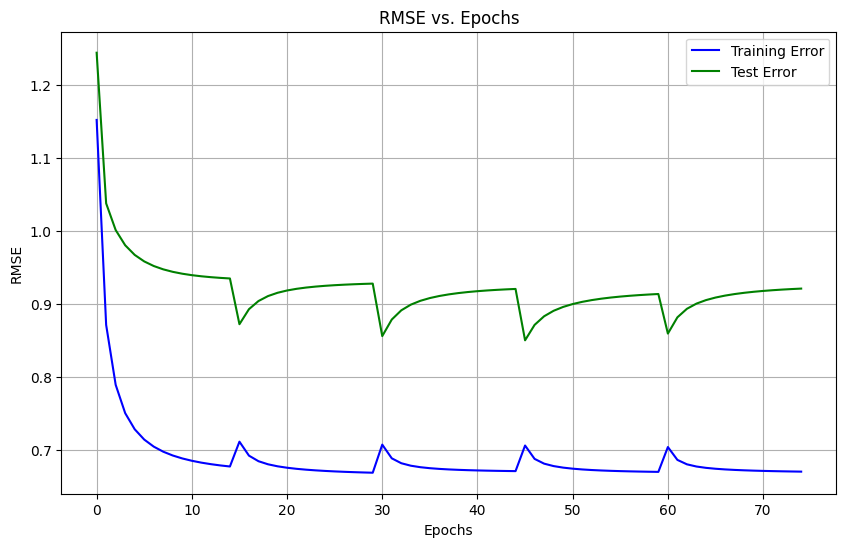

     Actual Rating  Predicted Rating
0              4.0          3.574912
99             4.0          3.578558
221            3.0          2.920255
285            3.0          3.035967
322            1.0          1.636549
743            3.0          3.231603


,Predicted Rating
407,4.299503
792,4.255307
168,4.107976
1466,4.059369
133,4.039354
170,4.000220
49,3.993654
744,3.975748
188,3.957898
1366,3.957727


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split


# Function to calculate RMSE
def rmse(I, R, Q, P):
    return np.sqrt(np.sum((I * (R - np.dot(P.T, Q)))**2) / len(R[R > 0]))

def precision(I, R, Q, P):
    # Calcul des prédictions
    predictions = np.dot(P.T, Q)

    # Comptage des vrais positifs et faux positifs
    true_positives = np.sum(np.abs(predictions[I == 1] - R[I == 1]) <= 1)
    false_positives = np.sum(np.abs(predictions[I == 0] - R[I == 0]) <= 1)


    # Calcul de la précision
    precision_score = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0

    return precision_score

# Read data
header = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(r'/content/u.data', sep='\t', names=header)

# Unique users and items
n_users = df.user_id.nunique()
n_items = df.item_id.nunique()

# Train-test split
train_data, test_data = train_test_split(df, test_size=0.25)

# Convert to DataFrames
train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)

# Create training and test matrix
R = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    R[line[1]-1, line[2]-1] = line[3]

T = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    T[line[1]-1, line[2]-1] = line[3]

# Model parameters
lmbda = 0.1
k = 20
n_epochs = 15

# Initialize matrices
P = 3 * np.random.rand(k, n_users)
Q = 3 * np.random.rand(k, n_items)
Q[0, :] = df[df['rating'] != 0].rating.mean()

# Learning rate
lr = 0.001
# Function to calculate precision with mean
def precision_with_mean(train_precisions):
    avg_precision = np.mean(train_precisions)
    return avg_precision


def calculate_recall(R, R_pred, threshold=1):
    # Sélectionner les éléments réels positifs où la différence entre la note prédite et la note réelle est inférieure à threshold
    mask = np.abs(R - R_pred) <= threshold
    total_positives = np.sum(R > 0)  # Nombre total d'éléments réels positifs
    true_positives = np.sum(np.logical_and(R > 0, mask))  # Nombre de vrais positifs correctement prédits
    false_negatives = total_positives - true_positives  # Nombre de faux négatifs
    recall = true_positives / (true_positives + false_negatives) if total_positives > 0 else 0  # Calcul du rappel
    return recall


def f1_score(precision, recall):
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)




# Error matrices
train_errors = []
test_errors = []
train_precisions = []
train_recalls = []
train_f1_scores = []


# K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

for fold, (train_index, test_index) in enumerate(kf.split(df)):
    train_data, test_data = df.iloc[train_index], df.iloc[test_index]

    # Create training and test matrix
    R_train = np.zeros((n_users, n_items))
    for line in train_data.itertuples():
        R_train[line[1]-1, line[2]-1] = line[3]

    R_test = np.zeros((n_users, n_items))
    for line in test_data.itertuples():
        R_test[line[1]-1, line[2]-1] = line[3]

    I_train = R_train.copy()
    I_train[I_train > 0] = 1
    I_train[I_train == 0] = 0

    I_test = R_test.copy()
    I_test[I_test > 0] = 1
    I_test[I_test == 0] = 0

    # Training loop
    for epoch in range(n_epochs):
        for i, Ii in enumerate(I_train):
            nui = np.count_nonzero(Ii)
            if nui == 0:
                nui = 1

            Ii_nonzero = np.nonzero(Ii)[0]
            Q_Ii = Q[:, Ii_nonzero]
            R_Ii = R_train[i, Ii_nonzero]
            Ai = np.dot(Q_Ii, Q_Ii.T) + lmbda * nui * np.eye(k)
            Vi = np.dot(Q_Ii, R_Ii.T)
            P[:, i] = np.linalg.solve(Ai, Vi)

        for j, Ij in enumerate(I_train.T):
            nmj = np.count_nonzero(Ij)
            if nmj == 0:
                nmj = 1

            Ij_nonzero = np.nonzero(Ij)[0]
            P_Ij = P[:, Ij_nonzero]
            R_Ij = R_train[Ij_nonzero, j]
            Aj = np.dot(P_Ij, P_Ij.T) + lmbda * nmj * np.eye(k)
            Vj = np.dot(P_Ij, R_Ij)
            Q[:, j] = np.linalg.solve(Aj, Vj)

       # Calculate errors
        train_rmse = rmse(I_train, R_train, Q, P)
        test_rmse = rmse(I_test, R_test, Q, P)
        train_errors.append(train_rmse)
        test_errors.append(test_rmse)

        # Calculate precision
        train_precision = precision(I_train, R_train, Q, P)
        train_precisions.append(train_precision)
        train_recalls.append(train_recall)
        # Calculate F1 score
        train_f1 = f1_score(train_precision, train_recall)
        train_f1_scores.append(train_f1)



        print("[Fold %d/10][Epoch %d/%d] train error: %f, test error: %f, train precision: %f, train recall: %f, train F1 score: %f" % (fold+1, epoch + 1, n_epochs, train_rmse, test_rmse, train_precision, train_recall, train_f1))

# Calculate mean precision
avg_f1_score = np.mean(train_f1_scores)
avg_recall = np.mean(train_recalls)
avg_precision = precision_with_mean(train_precisions)
print("Average Train Precision:", avg_precision)
print("Average Train RMSE:", np.mean(train_errors))
print("Average Test RMSE:", np.mean(test_errors))
print("Average Train Recall:", avg_recall)
print("Average Train F1 Score:", avg_f1_score)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Training Error', color='blue')
plt.plot(test_errors, label='Test Error', color='green')

plt.title('RMSE vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

# Calculate prediction matrix R_hat (low-rank approximation for R)
R_hat = pd.DataFrame(np.dot(P.T,Q))
R = pd.DataFrame(R)
T=  pd.DataFrame(T)


# Assurez-vous que R_hat a les mêmes indices et colonnes que R et T
R_hat = pd.DataFrame(np.dot(P.T, Q), index=R.index, columns=R.columns)

# Définir le nombre de films à afficher
n_films = 15  # Vous pouvez modifier cette valeur selon vos besoins

# Sélectionnez les évaluations réelles de l'utilisateur 17 dans l'ensemble de test
user_id = 16  # Utilisateur 17, ajustement pour l'indexation à partir de 0
actual_ratings = T.loc[user_id, T.loc[user_id, :] > 0]

# Sélectionnez les n premiers films évalués par cet utilisateur
actual_ratings_n = actual_ratings.head(n_films)

# Utilisez les indices des films évalués dans 'actual_ratings_n' pour sélectionner les prédictions correspondantes dans R_hat
predicted_ratings_n = R_hat.loc[user_id, actual_ratings_n.index]

# Créez un DataFrame pour comparer les évaluations réelles aux prédictions
ratings_comparison = pd.DataFrame({
    'Actual Rating': actual_ratings_n,
    'Predicted Rating': predicted_ratings_n
})

print(ratings_comparison)
#Meilleurs recommendations

predictions = R_hat.loc[16,R.loc[16,:] == 0] # Predictions for movies that the user 17 hasn't rated yet
top15 = predictions.sort_values(ascending=False).head(n=15)
recommendations = pd.DataFrame(data=top5)
recommendations.columns = ['Predicted Rating']

recommendations

K-cross 2

In [ ]:
import numpy as np
import pandas as pd

def load_data(filepath):
    header = ['user_id', 'item_id', 'rating', 'timestamp']
    df = pd.read_csv(filepath, sep='\t', names=header)
    return df

def create_utility_matrix(df, n_users, n_items):
    """Crée une matrice d'utilité à partir du DataFrame."""
    R = np.zeros((n_users, n_items))
    for line in df.itertuples():
        R[line.user_id - 1, line.item_id - 1] = line.rating
    return R

def als_factorization(R, num_factors, lambda_reg, n_epochs):
    num_users, num_items = R.shape

    # Initialize user and item latent factor matrices
    P = 3 * np.random.rand(num_factors, num_users)  # User latent feature matrix
    Q = 3 * np.random.rand(num_factors, num_items)  # Item latent feature matrix

    # Initialize the first row of Q with the average ratings for each item
    Q[0, :] = R[R != 0].mean(axis=0)  # Average rating for each item

    # Identity matrix of size num_factors for regularization
    E = np.eye(num_factors)

    # Training loop
    for epoch in range(n_epochs):
        for i in range(num_users):
            # User i's indicator vector for rated items
            Ii = R[i, :] > 0
            nui = Ii.sum()  # Number of items rated by user i
            # Avoid division by zero
            if nui == 0:
                nui = 1

            # Indices of items rated by user i
            Ii_nonzero = np.nonzero(Ii)[0]
            # Latent item features for items rated by user i
            Q_Ii = Q[:, Ii_nonzero]
            # Ratings of user i for rated items
            R_Ii = R[i, Ii_nonzero]
            # Solve for user i's latent features
            Ai = np.dot(Q_Ii, Q_Ii.T) + lambda_reg * nui * E
            Vi = np.dot(Q_Ii, R_Ii.T)
            P[:, i] = np.linalg.solve(Ai, Vi)

        for j in range(num_items):
            # Item j's indicator vector for users who rated it
            Ij = R[:, j] > 0
            nmj = Ij.sum()  # Number of users that rated item j
            # Avoid division by zero
            if nmj == 0:
                nmj = 1

            # Indices of users who rated item j
            Ij_nonzero = np.nonzero(Ij)[0]
            # Latent user features for users who rated item j
            P_Ij = P[:, Ij_nonzero]
            # Ratings for item j by users who rated it
            R_Ij = R[Ij_nonzero, j]
            # Solve for item j's latent features
            Aj = np.dot(P_Ij, P_Ij.T) + lambda_reg * nmj * E
            Vj = np.dot(P_Ij, R_Ij)
            Q[:, j] = np.linalg.solve(Aj, Vj)

    return P.T, Q  # Return the transpose of P to match the user-item rating matrix dimensions

def calculate_rmse(R, P, Q):
    # Calculer les prédictions
    R_pred = np.dot(P, Q)

    # Appliquer un masque pour sélectionner uniquement les éléments pour lesquels R a une évaluation
    mask = R > 0

    # Calculer l'erreur quadratique moyenne uniquement sur les éléments évalués
    mse = ((R[mask] - R_pred[mask]) ** 2).mean()

    # Retourner la racine carrée de l'erreur quadratique moyenne
    return np.sqrt(mse)

def calculate_precision(R, R_pred):
    mask = R > 0
    total_items = np.sum(mask)
    correct_predictions = np.sum(np.abs(R[mask] - R_pred[mask]) <= 1)
    precision = correct_predictions / total_items if total_items > 0 else 0
    return precision


def calculate_recall(R, R_pred, threshold=0.5):
    # Sélectionner les éléments réels positifs où la différence entre la note prédite et la note réelle est inférieure à threshold
    mask = np.abs(R - R_pred) <= 0.5
    total_positives = np.sum(R > 0)  # Nombre total d'éléments réels positifs
    true_positives = np.sum(np.logical_and(R > 0, mask))  # Nombre de vrais positifs correctement prédits
    false_negatives = total_positives - true_positives  # Nombre de faux négatifs
    recall = true_positives / (true_positives + false_negatives) if total_positives > 0 else 0  # Calcul du rappel
    return recall


def f1_score(precision, recall):
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)




def main_als_kfold_cross_validation():
    num_factors = 20
    lambda_reg = 0.1
    n_epochs = 15
    rmse_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for i in range(1, 6):  # Pour u1 à u5
        # Charger les ensembles de données d'entraînement et de test
        train_df = load_data(f'/content/u{i}.base')
        test_df = load_data(f'/content/u{i}.test')

        n_users = max(train_df['user_id'].max(), test_df['user_id'].max())
        n_items = max(train_df['item_id'].max(), test_df['item_id'].max())

        # Créer les matrices d'utilité pour l'entraînement et le test
        R_train = create_utility_matrix(train_df, n_users, n_items)
        R_test = create_utility_matrix(test_df, n_users, n_items)

        # Appliquer la factorisation ALS sur l'ensemble d'entraînement
        P, Q = als_factorization(R_train, num_factors, lambda_reg, n_epochs)
        R_pred = np.dot(P, Q)
        # Calculer le RMSE sur l'ensemble de test
        rmse = calculate_rmse(R_test, P, Q)
        precision = calculate_precision(R_test, R_pred)
        recall = calculate_recall(R_test, R_pred)
        train_f1 = f1_score(train_precision, train_recall)
        f1 = f1_score(precision, recall)
        rmse_scores.append(rmse)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)


        print(f"Fold {i}: RMSE = {rmse:.4f}, Precision = {precision:.4f}, recall = {recall:.4f}, f1_score = {f1:.4f}")

    print(f"Mean RMSE: {np.mean(rmse_scores):.4f}")
    print(f"Mean Precision: {np.mean(precision_scores):.4f}")
    print(f"Mean Recall: {np.mean(recall_scores):.4f}")
    print(f"Mean F1-Score: {np.mean(f1_scores):.4f}")



    # Convertissez R_test en DataFrame pour une manipulation facile
    R_test_df = pd.DataFrame(R_test, index=[f'User {i+1}' for i in range(n_users)], columns=[f'Item {i+1}' for i in range(n_items)])

    # Créer la matrice de prédiction R_hat à partir de P et Q
    R_hat_df = pd.DataFrame(np.dot(P, Q), index=R_test_df.index, columns=R_test_df.columns)

    user_id = 10  # Ajustement pour l'indexation à partir de 0
    n_films = 20

    # Sélectionnez les évaluations réelles et prédites pour cet utilisateur spécifique
    actual_ratings = R_test_df.iloc[user_id]
    actual_ratings = actual_ratings[actual_ratings > 0]
    predicted_ratings = R_hat_df.iloc[user_id][actual_ratings.index]

    # Comparaison des évaluations réelles et prédites
    ratings_comparison = pd.DataFrame({
        'Actual Rating': actual_ratings,
        'Predicted Rating': predicted_ratings
    }).head(n_films)

    print(f'\nComparaison des évaluations pour User {user_id+1}:')
    print(ratings_comparison)
    #Meilleurs recommendations

    predictions = R_hat.loc[16,R.loc[16,:] == 0] # Predictions for movies that the user 17 hasn't rated yet
    top15 = predictions.sort_values(ascending=False).head(n=15)
    recommendations = pd.DataFrame(data=top5)
    recommendations.columns = ['Predicted Rating']
    print(recommendations)

main_als_kfold_cross_validation()


Fold 1: RMSE = 0.9413, Precision = 0.7202, recall = 0.4076, f1_score = 0.5206
Fold 2: RMSE = 0.9324, Precision = 0.7279, recall = 0.4163, f1_score = 0.5297
Fold 3: RMSE = 0.9326, Precision = 0.7282, recall = 0.4130, f1_score = 0.5271
Fold 4: RMSE = 0.9322, Precision = 0.7267, recall = 0.4143, f1_score = 0.5278
Fold 5: RMSE = 0.9378, Precision = 0.7192, recall = 0.4113, f1_score = 0.5234
Mean RMSE: 0.9353
Mean Precision: 0.7245
Mean Recall: 0.4125
Mean F1-Score: 0.5257

Comparaison des évaluations pour User 11:
          Actual Rating  Predicted Rating
Item 11             2.0          3.485296
Item 107            4.0          3.379980
Item 173            5.0          3.765158
Item 213            4.0          4.127897
Item 229            4.0          2.538432
Item 239            4.0          3.109201
Item 324            1.0          2.840172
Item 356            4.0          3.062170
Item 365            3.0          2.756747
Item 382            3.0          3.559317
Item 393            4.

SVD

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162732 sha256=02bb148ad2607ed528c6a7290bc7d5b17607b7cf5e15d34bfc050130a00b0122
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
import numpy as np
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.matrix_factorization import SVD

def load_data(filepath):
    header = ['user_id', 'item_id', 'rating', 'timestamp']
    df = pd.read_csv(filepath, sep='\t', names=header)
    return df

def create_utility_matrix(df, n_users, n_items):
    """Crée une matrice d'utilité à partir du DataFrame."""
    R = np.zeros((n_users, n_items))
    for line in df.itertuples():
        R[line.user_id - 1, line.item_id - 1] = line.rating
    return R

def calculate_rmse(R, P, Q):
    # Calculer les prédictions
    R_pred = np.dot(P, Q)

    # Appliquer un masque pour sélectionner uniquement les éléments pour lesquels R a une évaluation
    mask = R > 0

    # Calculer l'erreur quadratique moyenne uniquement sur les éléments évalués
    mse = ((R[mask] - R_pred[mask]) ** 2).mean()

    # Retourner la racine carrée de l'erreur quadratique moyenne
    return np.sqrt(mse)

def calculate_precision(R, R_pred):
    mask = R > 0
    total_items = np.sum(mask)
    correct_predictions = np.sum(np.abs(R[mask] - R_pred[mask]) <= 1)
    precision = correct_predictions / total_items if total_items > 0 else 0
    return precision

def calculate_recall(R, R_pred):
    mask = R > 0  # Sélectionne les éléments réels
    total_positives = np.sum(R)  # Nombre total de vrais positifs (éléments non nuls dans R)
    true_positives = np.sum(np.logical_and(R[mask], R_pred[mask]))  # Nombre de vrais positifs correctement prédits
    false_negatives = total_positives - true_positives  # Nombre de faux négatifs
    recall = true_positives / (true_positives + false_negatives) if total_positives > 0 else 0  # Calcul du rappel
    return recall

def calculate_f1_score(R, R_pred):
    precision = calculate_precision(R, R_pred)
    recall = calculate_recall(R, R_pred)
    if precision + recall == 0:
        return 0
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

def main_svd_kfold_cross_validation():
    num_factors = 20
    n_epochs = 15
    lambda_reg = 0.1
    rmse_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for i in range(1, 6):  # Pour u1 à u5
        # Charger les ensembles de données d'entraînement et de test
        train_df = load_data(f'/content/u{i}.base')
        test_df = load_data(f'/content/u{i}.test')

        # Créer un objet Reader avec l'échelle de notation désirée
        reader = Reader(rating_scale=(1, 5))

        # Charger les données dans le format attendu par Surprise
        train_data = Dataset.load_from_df(train_df[['user_id', 'item_id', 'rating']], reader)
        test_data = Dataset.load_from_df(test_df[['user_id', 'item_id', 'rating']], reader)

        # Construire et entraîner le modèle SVD
        model = SVD(n_factors=num_factors, n_epochs=n_epochs, reg_all=lambda_reg)
        model.fit(train_data.build_full_trainset())

        # Générer les prédictions pour les données de test
        predictions = model.test(test_data.build_full_trainset().build_testset())

        # Extraire les vraies notes et les prédictions
        true_ratings = np.array([pred.r_ui for pred in predictions])
        predicted_ratings = np.array([pred.est for pred in predictions])

        # Calculer les mesures d'évaluation
        rmse = np.sqrt(np.mean((true_ratings - predicted_ratings) ** 2))
        precision = np.mean(np.abs(true_ratings - predicted_ratings) <= 1)
        recall = np.sum(np.logical_and(true_ratings > 3, predicted_ratings > 3)) / np.sum(true_ratings > 3)
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

        # Stocker les scores
        rmse_scores.append(rmse)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1_score)

        # Afficher les résultats pour chaque itération de la validation croisée
        print(f"Fold {i}: RMSE = {rmse:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1-Score = {f1_score:.4f}")

    # Afficher les moyennes des scores
    print(f"Mean RMSE: {np.mean(rmse_scores):.4f}")
    print(f"Mean Precision: {np.mean(precision_scores):.4f}")
    print(f"Mean Recall: {np.mean(recall_scores):.4f}")
    print(f"Mean F1-Score: {np.mean(f1_scores):.4f}")

main_svd_kfold_cross_validation()

Fold 1: RMSE = 0.9599, Precision = 0.7085, Recall = 0.9511, F1-Score = 0.8120
Fold 2: RMSE = 0.9479, Precision = 0.7190, Recall = 0.9495, F1-Score = 0.8184
Fold 3: RMSE = 0.9408, Precision = 0.7222, Recall = 0.9405, F1-Score = 0.8170
Fold 4: RMSE = 0.9384, Precision = 0.7196, Recall = 0.9430, F1-Score = 0.8163
Fold 5: RMSE = 0.9398, Precision = 0.7146, Recall = 0.9473, F1-Score = 0.8147
Mean RMSE: 0.9454
Mean Precision: 0.7168
Mean Recall: 0.9463
Mean F1-Score: 0.8157


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read data
header = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(r'/u.data', sep='\t', names=header)

# Unique users and items
n_users = df.user_id.nunique()
n_items = df.item_id.nunique()

# Train-test split
train_data, test_data = train_test_split(df, test_size=0.20)

# Convert to DataFrames
train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)

# Create training and test matrix
R = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    R[line[1]-1, line[2]-1] = line[3]

T = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    T[line[1]-1, line[2]-1] = line[3]

# Index matrix for training data
I = R.copy()
I[I > 0] = 1
I[I == 0] = 0

# Index matrix for test data
I2 = T.copy()
I2[I2 > 0] = 1
I2[I2 == 0] = 0
# Model parameters
lmbda = 0.1
k = 20
m, n = R.shape
n_epochs = 15
# Initialize matrices
P = 3 * np.random.rand(k, m)
Q = 3 * np.random.rand(k, n)
Q[0, :] = R[R != 0].mean(axis=0)
E = np.eye(k)

# Learning rate
lr = 0.001
# Training loop
for epoch in range(n_epochs):
    for i, Ii in enumerate(I):
        nui = np.count_nonzero(Ii)
        if nui == 0:
            nui = 1

        Ii_nonzero = np.nonzero(Ii)[0]
        Q_Ii = Q[:, Ii_nonzero]
        R_Ii = R[i, Ii_nonzero]
        Ai = np.dot(Q_Ii, Q_Ii.T) + lmbda * nui * E
        Vi = np.dot(Q_Ii, R_Ii.T)
        P[:, i] = np.linalg.solve(Ai, Vi)

    for j, Ij in enumerate(I.T):
        nmj = np.count_nonzero(Ij)
        if nmj == 0:
            nmj = 1

        Ij_nonzero = np.nonzero(Ij)[0]
        P_Ij = P[:, Ij_nonzero]
        R_Ij = R[Ij_nonzero, j]
        Aj = np.dot(P_Ij, P_Ij.T) + lmbda * nmj * E
        Vj = np.dot(P_Ij, R_Ij)
        Q[:, j] = np.linalg.solve(Aj, Vj)
# Calculate prediction matrix R_hat (low-rank approximation for R)
R_hat = pd.DataFrame(np.dot(P.T,Q))
R = pd.DataFrame(R)
T=  pd.DataFrame(T)
# Assurez-vous que R_hat a les mêmes indices et colonnes que R et T
R_hat = pd.DataFrame(np.dot(P.T, Q), index=R.index, columns=R.columns)
predictions = R_hat.loc[16,R.loc[16,:] == 0] # Predictions for movies that the user 17 hasn't rated yet
top5 = predictions.sort_values(ascending=False).head(n=15)
recommendations = pd.DataFrame(data=top5)
recommendations.columns = ['Predicted Rating']

recommendations

,Predicted Rating
168,4.338167
170,4.034599
223,3.997288
1142,3.940175
49,3.940010
693,3.893009
47,3.870859
407,3.852629
1466,3.848576
637,3.827687
